# Keras
What is Keras?
Keras is a high level deep learning API that lets you build, train and evaluate neural networks


## Training a Neural Network (NN) model
**How do we train a Neural Network (NN) model?**
To train a deep learning model, the steps are:
1. **Define the model**: We need to inform Keras about the architecture of our NN before we can define the model:
    - no. of neurons in each hidden layer
    - layers
    - type of activation
    
2. **Compile the model**:  Usually, NN's make use of large datasets during training. This can be cumbersome if we just use the normal python software (or in deed any other high level programming language. It is efficient and fast to make use of a low level programming language like C/C++ to perform model training and evaluation.

    In model compilation we have to define the following
    - **Optimizers** e.g. gradient descent in linear regression
    - **Metrics:** These defined during evaluation e.g. accuracy, recall etc.
    - **Loss function:** The function that we wish to minimize


## Task:
- The task in this encounter is to build and train a neural network model that solves the classification task from yesterday (encounter on feed forward and back propagation)

### Import common modules

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["font.size"] = 15
plt.rcParams["font.family"] = "Monaco"

: 

In [23]:
X, y = make_moons(n_samples=5000, noise = 0.2, random_state=42)

In [24]:
X.shape, y.shape

((5000, 2), (5000,))

### Make a scatter plot

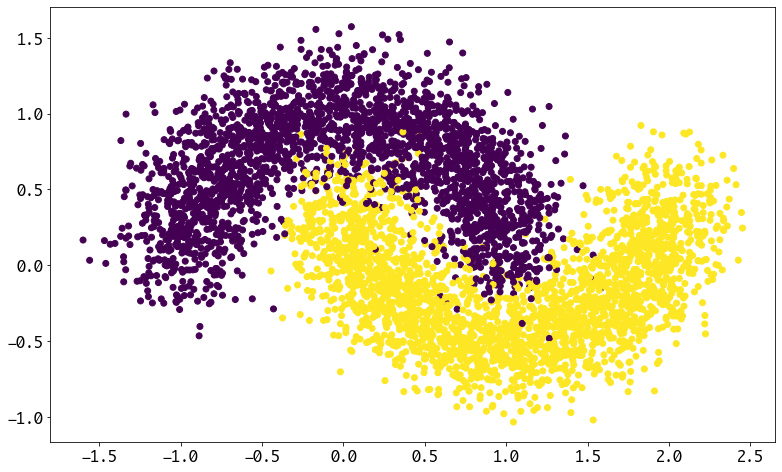

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y);

### importing and using `keras`  package through `tensorflow`
- Import `keras` package for building, training and evaluating our NN model

#### Ignore any keras warnings for now

In [26]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

#### Import the feed forward module `sequential`

In [27]:
from tensorflow.keras.models import Sequential

#### Modeling the various hidden (fully connected) layers
**Import module `Dense`**

In [28]:
from tensorflow.keras.layers import Dense

#### Activation module 
- Import the necessary module that has all activation methods

In [29]:
from tensorflow.keras.layers import Activation

#### Import the backend module `backend`
- Use to clear session to avoid overloading everytime we run our script

#### Clear Keras `backend` session

In [105]:
from tensorflow.keras import backend as K

### Clear the backend session to offload our current session

In [110]:
K.clear_session()

## 1. Define the model
**Feed Forward network from yesterday**
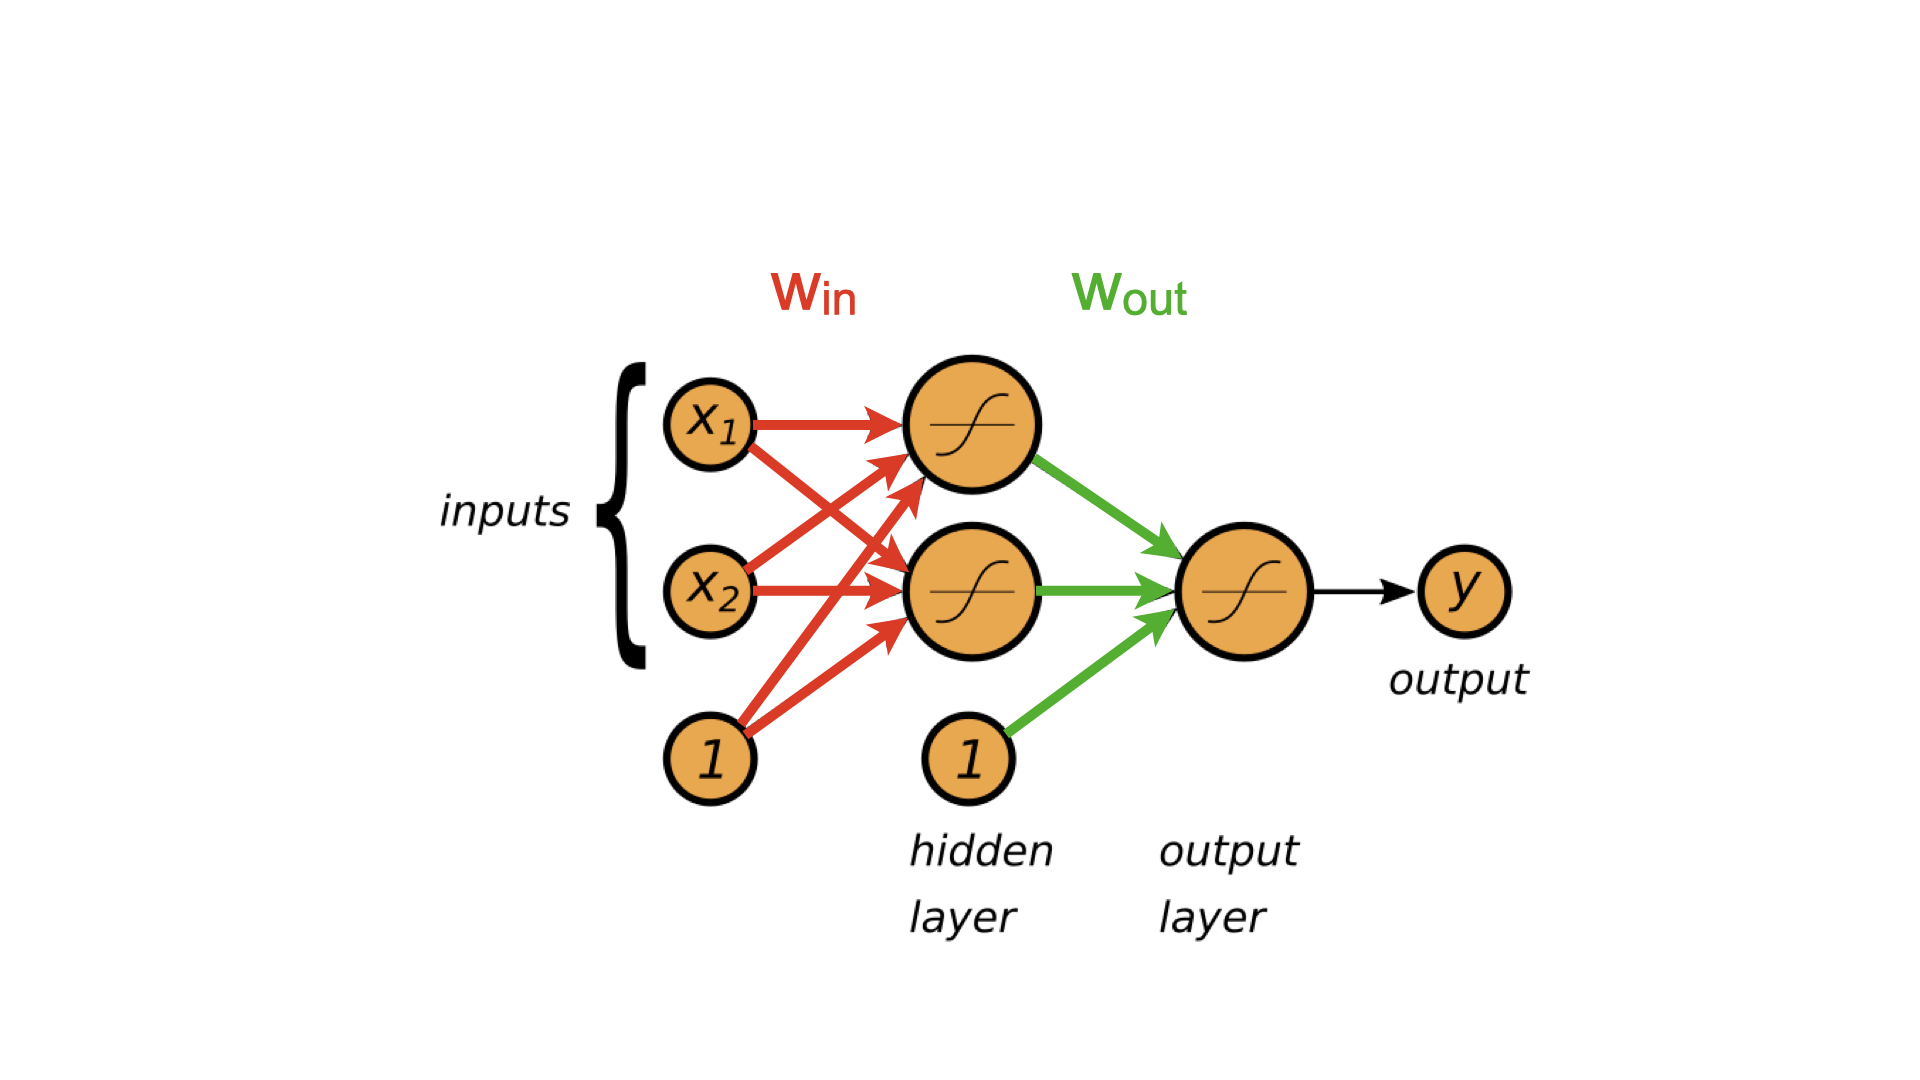


In [31]:
model = Sequential([
    # First layers (first hidden layer)
    Dense(units=2, input_shape=(2, )), ## We have 2 neurons in the first hidden layer, and 2 features in our input
    Activation("sigmoid"), ### The activation function is sigmoid
    
    # Output layer
    Dense(units=1), # We only have one neuron in the output layer
    # It is not important to define the output shape of the rest of the layers
    Activation("sigmoid")
    
])

- Assuming that we have 3 hidden layers
    - first layer: has 3 neurons
    - second layer: has 4 neurons
    - third layer: has 3 neurons
  
  How would our archictecure look like?
  - Go to the bottom of this jupyter notebook and find the architecture
    
    

#### Check the model summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### Inspect the inital random weights

In [38]:
model.get_weights()


[array([[ 0.20330608, -0.15648735],
        [ 0.437037  , -1.0641888 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.38590634],
        [0.46357822]], dtype=float32),
 array([0.], dtype=float32)]

### 2. Compile the model
- This translates the architecture into a lower level tensorflow/C
- Must specify an optimizer. Here is a  list of optimizers:
    - SGD: Gradient descent
    - RMSprop
    - Adam
    - Adadelta
    - Adagrad
    - Adamax
    - Nadam
    - Ftrl

Feel free to check on each of them at: [optimizers](https://keras.io/api/optimizers/)

- As for our current task, we shall implement the **gradient descent** optimizer `sgd`
- Since we are having a classification problem, we use the `binary_crossentropy` for the loss and use `accuracy` as our evaluation metric

In [39]:
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

### 3. Fit
- Once the model is compiled, we need to fit it to our data
- We have to expressly determine:
    - how many backpropagations do we want to make (`epochs`)
    - number of samples to propagate through the network (`batch_size`)
        - Remember all samples (batches) must be processed in each epoch!
    - how much test data vs training data for model validation (`validation_split`)
    - whether we want to see the output on the screen as the model fits the data (`verbose`)

In [40]:
fit_history = model.fit(X, y, epochs=500, batch_size=50, validation_split=0.2, verbose=1)

Epoch 1/500
80/80 [==============================] - 1s 8ms/step - loss: 0.6957 - accuracy: 0.4938 - val_loss: 0.6809 - val_accuracy: 0.5250
Epoch 2/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.4938 - val_loss: 0.6760 - val_accuracy: 0.5250
Epoch 3/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.4938 - val_loss: 0.6726 - val_accuracy: 0.5250
Epoch 4/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.4938 - val_loss: 0.6699 - val_accuracy: 0.5250
Epoch 5/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.4967 - val_loss: 0.6674 - val_accuracy: 0.5450
Epoch 6/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.5615 - val_loss: 0.6649 - val_accuracy: 0.6490
Epoch 7/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.6730 - val_loss: 0.6621 - val_accuracy: 0.7530
Epoch 8/500
8

Epoch 59/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.8555 - val_loss: 0.4190 - val_accuracy: 0.8500
Epoch 60/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8558 - val_loss: 0.4163 - val_accuracy: 0.8500
Epoch 61/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8565 - val_loss: 0.4137 - val_accuracy: 0.8500
Epoch 62/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8568 - val_loss: 0.4112 - val_accuracy: 0.8520
Epoch 63/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8570 - val_loss: 0.4087 - val_accuracy: 0.8510
Epoch 64/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8568 - val_loss: 0.4063 - val_accuracy: 0.8510
Epoch 65/500
80/80 [==============================] - 0s 4ms/step - loss: 0.4009 - accuracy: 0.8583 - val_loss: 0.4040 - val_accuracy: 0.8510
Epoch 

80/80 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8695 - val_loss: 0.3181 - val_accuracy: 0.8610
Epoch 174/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8698 - val_loss: 0.3179 - val_accuracy: 0.8610
Epoch 175/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8692 - val_loss: 0.3177 - val_accuracy: 0.8620
Epoch 176/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8698 - val_loss: 0.3175 - val_accuracy: 0.8630
Epoch 177/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8698 - val_loss: 0.3173 - val_accuracy: 0.8630
Epoch 178/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8698 - val_loss: 0.3171 - val_accuracy: 0.8630
Epoch 179/500
80/80 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8698 - val_loss: 0.3169 - val_accuracy: 0.8640
Epoch 180/500

80/80 [==============================] - 0s 3ms/step - loss: 0.2994 - accuracy: 0.8675 - val_loss: 0.3069 - val_accuracy: 0.8630
Epoch 288/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8677 - val_loss: 0.3069 - val_accuracy: 0.8630
Epoch 289/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2993 - accuracy: 0.8675 - val_loss: 0.3069 - val_accuracy: 0.8630
Epoch 290/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8675 - val_loss: 0.3068 - val_accuracy: 0.8630
Epoch 291/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8675 - val_loss: 0.3068 - val_accuracy: 0.8630
Epoch 292/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.8677 - val_loss: 0.3067 - val_accuracy: 0.8630
Epoch 293/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.8677 - val_loss: 0.3067 - val_accuracy: 0.8630
Epoch 294/500

80/80 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.8683 - val_loss: 0.3029 - val_accuracy: 0.8610
Epoch 402/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8687 - val_loss: 0.3029 - val_accuracy: 0.8610
Epoch 403/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8687 - val_loss: 0.3029 - val_accuracy: 0.8610
Epoch 404/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8687 - val_loss: 0.3029 - val_accuracy: 0.8610
Epoch 405/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8683 - val_loss: 0.3029 - val_accuracy: 0.8610
Epoch 406/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8680 - val_loss: 0.3028 - val_accuracy: 0.8610
Epoch 407/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8683 - val_loss: 0.3028 - val_accuracy: 0.8610
Epoch 408/500

#### Inspect history for training/validation loss/accuracy at each epoch

In [45]:
fit_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### View loss and accuracy as a table

In [46]:
import pandas as pd

In [47]:
pd.DataFrame(fit_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.695701,0.49375,0.680861,0.525
1,0.686649,0.49375,0.675955,0.525
2,0.680625,0.49375,0.672635,0.525
3,0.676227,0.49375,0.669942,0.525
4,0.672592,0.49675,0.667435,0.545
...,...,...,...,...
495,0.293838,0.86925,0.300714,0.862
496,0.293824,0.86900,0.300717,0.862
497,0.293800,0.86850,0.300708,0.862
498,0.293783,0.86850,0.300627,0.862


#### Get the learned weights

In [49]:
model.get_weights()

[array([[-0.4136635 ,  0.83952624],
        [ 1.0790657 , -3.3351412 ]], dtype=float32),
 array([0.04503632, 0.32643834], dtype=float32),
 array([[-1.3750727],
        [ 6.608958 ]], dtype=float32),
 array([-2.5296192], dtype=float32)]

### 4. Evaluate the model
- plot both training and validation accuracies

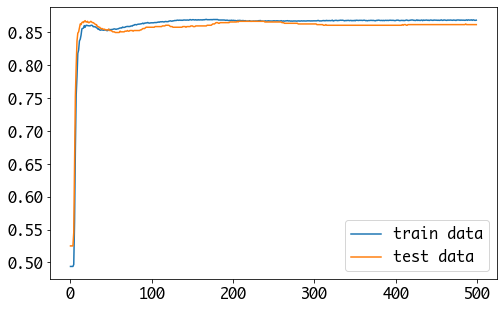

In [66]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.plot(fit_history.history["accuracy"], label="train data")
plt.plot(fit_history.history["val_accuracy"], label="test data")
plt.legend();

- plot both training and validation losses

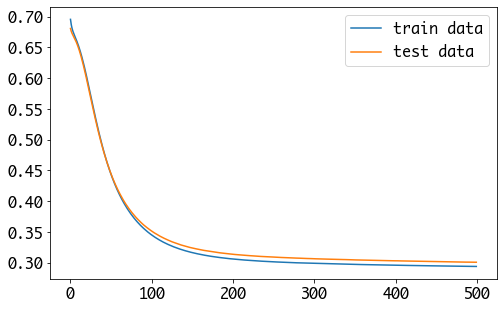

In [67]:
plt.plot(fit_history.history["loss"], label="train data")
plt.plot(fit_history.history["val_loss"], label="test data")
plt.legend();

### 5. Prediction

In [68]:
y_pred = model.predict(X)

157/157 [==============================] - 0s 2ms/step


### 6. How does the prediction look like?
- plot the original scatter plot colored by original y and predicted y as two plots

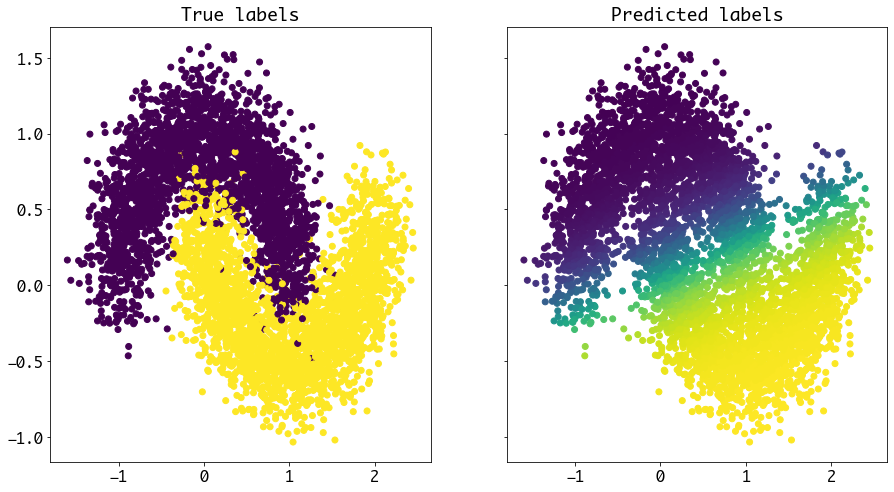

In [69]:
plt.rcParams["figure.figsize"] = (15, 8)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X[:, 0], X[:, 1], c=y) # color with original y
ax1.title.set_text("True labels") 
ax2.scatter(X[:, 0], X[:, 1], c=y_pred) # color with predicted y
ax2.title.set_text("Predicted labels")

### Let us transform our probabilities into actual labels [0, 1]

In [72]:
ypred_labels = [1 if i > 0.5 else 0 for i in y_pred]

#### Re-plot and use the predicted labels as color

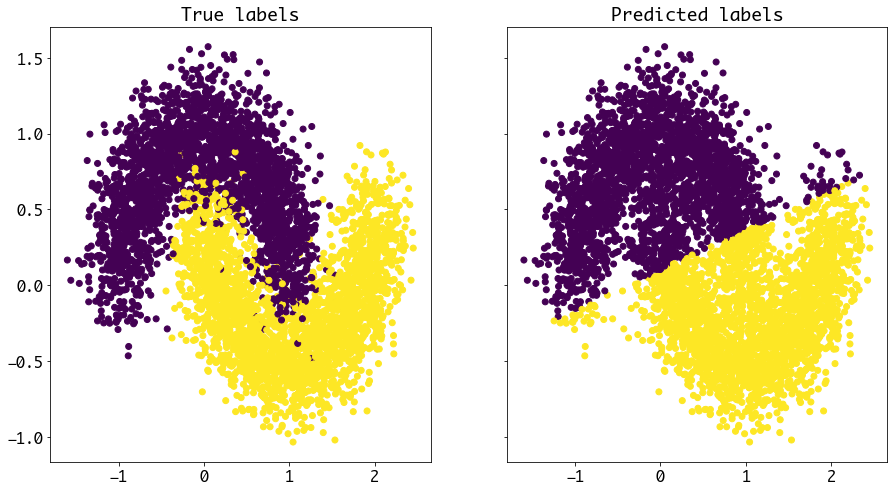

In [74]:
plt.rcParams["figure.figsize"] = (15, 8)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X[:, 0], X[:, 1], c=y) # color with original y
ax1.title.set_text("True labels") 
ax2.scatter(X[:, 0], X[:, 1], c=ypred_labels) # color with predicted y
ax2.title.set_text("Predicted labels")

### 6. Save the Keras model as a H5 file (containing the parameters)

`pip install h5py`

In [75]:
model.save("moon_weights.h5")

#### Check if the model is saved [linux/mac/git bash users]

In [77]:
! ls -lrt -lh *h5

-rw-rw-r-- 1 joseph joseph 19K Jul 12 15:24 moon_weights.h5


### 6.1 Save the history as JSON

In [87]:
fit_history.history

{'loss': [0.6957007050514221,
  0.6866487264633179,
  0.6806249618530273,
  0.6762268543243408,
  0.6725916862487793,
  0.6693072319030762,
  0.6661122441291809,
  0.6628602743148804,
  0.6594621539115906,
  0.6558873653411865,
  0.6520809531211853,
  0.6480426788330078,
  0.6437627077102661,
  0.639242947101593,
  0.6344753503799438,
  0.6294775009155273,
  0.6242691278457642,
  0.6188656687736511,
  0.6132665276527405,
  0.6075242757797241,
  0.6016276478767395,
  0.5956243276596069,
  0.5895311832427979,
  0.583377480506897,
  0.577165424823761,
  0.570949375629425,
  0.5647411942481995,
  0.5585368871688843,
  0.5523812770843506,
  0.546269416809082,
  0.5402384400367737,
  0.5342764854431152,
  0.5284103751182556,
  0.5226369500160217,
  0.5169838666915894,
  0.511429488658905,
  0.5060141682624817,
  0.5006909370422363,
  0.4955119490623474,
  0.490449458360672,
  0.4855177104473114,
  0.48071298003196716,
  0.47604313492774963,
  0.4714857041835785,
  0.46706727147102356,
  0.46

In [88]:
import pickle

In [96]:
with open('moon_model_history.pkl', 'wb') as f:
    pickle.dump(fit_history.history, f)

In [97]:
!ls -lrt -lh *pkl

-rw-rw-r-- 1 joseph joseph 18K Jul 12 15:29 data.pkl
-rw-rw-r-- 1 joseph joseph 18K Jul 12 15:33 moon_model_history.pkl


### 7. Reading the contents of the h5 file
- What if we wish to load the model from file?
- We have to import the `load_model` method from `keras.models` module

- import the `load_model` module

In [78]:
from tensorflow.keras.models import load_model

- Read the parameters

In [79]:
old_model = load_model("moon_weights.h5")


- Get the model summary

In [80]:
old_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### Capture the weights from the saved model

In [81]:
old_model.get_weights()

[array([[-0.4136635 ,  0.83952624],
        [ 1.0790657 , -3.3351412 ]], dtype=float32),
 array([0.04503632, 0.32643834], dtype=float32),
 array([[-1.3750727],
        [ 6.608958 ]], dtype=float32),
 array([-2.5296192], dtype=float32)]

#### Read the contents of the pickle

In [98]:
pickle.load(open("moon_model_history.pkl", "rb"))

{'loss': [0.6957007050514221,
  0.6866487264633179,
  0.6806249618530273,
  0.6762268543243408,
  0.6725916862487793,
  0.6693072319030762,
  0.6661122441291809,
  0.6628602743148804,
  0.6594621539115906,
  0.6558873653411865,
  0.6520809531211853,
  0.6480426788330078,
  0.6437627077102661,
  0.639242947101593,
  0.6344753503799438,
  0.6294775009155273,
  0.6242691278457642,
  0.6188656687736511,
  0.6132665276527405,
  0.6075242757797241,
  0.6016276478767395,
  0.5956243276596069,
  0.5895311832427979,
  0.583377480506897,
  0.577165424823761,
  0.570949375629425,
  0.5647411942481995,
  0.5585368871688843,
  0.5523812770843506,
  0.546269416809082,
  0.5402384400367737,
  0.5342764854431152,
  0.5284103751182556,
  0.5226369500160217,
  0.5169838666915894,
  0.511429488658905,
  0.5060141682624817,
  0.5006909370422363,
  0.4955119490623474,
  0.490449458360672,
  0.4855177104473114,
  0.48071298003196716,
  0.47604313492774963,
  0.4714857041835785,
  0.46706727147102356,
  0.46

In [101]:
!ls -lrt *pkl *h5

-rw-rw-r-- 1 joseph joseph 19448 Jul 12 15:24 moon_weights.h5
-rw-rw-r-- 1 joseph joseph 18076 Jul 12 15:33 moon_model_history.pkl


### Follow up on a different architecture mooted above

- Assuming that we have 3 hidden layers
    - first layer: has 3 neurons
    - second layer: has 4 neurons
    - third layer: has 3 neurons
  
  How would our archictecure look like?

In [111]:
model_new = Sequential([
    # First layer
    Dense(units=3, input_shape=(2, )),
    Activation("sigmoid"),
    
    # Second layer
    Dense(units=4),
    Activation("sigmoid"),
    
    # Third layer
    Dense(units=3),
    Activation("sigmoid"),
    
    # Output layer
    Dense(units=1),
    Activation("sigmoid")
])

In [112]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 16        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4

In [113]:
model_new.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [114]:
fit_history = model_new.fit(X, y, epochs=500, batch_size=50, validation_split=0.2, verbose=1)

Epoch 1/500
80/80 [==============================] - 1s 6ms/step - loss: 0.7132 - accuracy: 0.5063 - val_loss: 0.7176 - val_accuracy: 0.4750
Epoch 2/500
80/80 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.5063 - val_loss: 0.7077 - val_accuracy: 0.4750
Epoch 3/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5063 - val_loss: 0.7022 - val_accuracy: 0.4750
Epoch 4/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5063 - val_loss: 0.6992 - val_accuracy: 0.4750
Epoch 5/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5063 - val_loss: 0.6974 - val_accuracy: 0.4750
Epoch 6/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5063 - val_loss: 0.6964 - val_accuracy: 0.4750
Epoch 7/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5063 - val_loss: 0.6957 - val_accuracy: 0.4750
Epoch 8/500
8

Epoch 59/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6940 - val_accuracy: 0.4750
Epoch 60/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6940 - val_accuracy: 0.4750
Epoch 61/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5063 - val_loss: 0.6941 - val_accuracy: 0.4750
Epoch 62/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6940 - val_accuracy: 0.4750
Epoch 63/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6940 - val_accuracy: 0.4750
Epoch 64/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6940 - val_accuracy: 0.4750
Epoch 65/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6940 - val_accuracy: 0.4750
Epoch 

80/80 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5063 - val_loss: 0.6933 - val_accuracy: 0.4750
Epoch 174/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 175/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5063 - val_loss: 0.6933 - val_accuracy: 0.4750
Epoch 176/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5063 - val_loss: 0.6933 - val_accuracy: 0.4750
Epoch 177/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 178/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 179/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 180/500

80/80 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5393 - val_loss: 0.6913 - val_accuracy: 0.5260
Epoch 288/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5860 - val_loss: 0.6913 - val_accuracy: 0.5100
Epoch 289/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5213 - val_loss: 0.6912 - val_accuracy: 0.5490
Epoch 290/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5390 - val_loss: 0.6912 - val_accuracy: 0.5610
Epoch 291/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5965 - val_loss: 0.6912 - val_accuracy: 0.5360
Epoch 292/500
80/80 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5918 - val_loss: 0.6912 - val_accuracy: 0.5190
Epoch 293/500
80/80 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5633 - val_loss: 0.6911 - val_accuracy: 0.5190
Epoch 294/500

80/80 [==============================] - 0s 6ms/step - loss: 0.6776 - accuracy: 0.6768 - val_loss: 0.6788 - val_accuracy: 0.6580
Epoch 402/500
80/80 [==============================] - 0s 6ms/step - loss: 0.6773 - accuracy: 0.6720 - val_loss: 0.6786 - val_accuracy: 0.6570
Epoch 403/500
80/80 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.6787 - val_loss: 0.6783 - val_accuracy: 0.6610
Epoch 404/500
80/80 [==============================] - 0s 6ms/step - loss: 0.6766 - accuracy: 0.6765 - val_loss: 0.6780 - val_accuracy: 0.6610
Epoch 405/500
80/80 [==============================] - 0s 6ms/step - loss: 0.6763 - accuracy: 0.6810 - val_loss: 0.6776 - val_accuracy: 0.6650
Epoch 406/500
80/80 [==============================] - 0s 6ms/step - loss: 0.6759 - accuracy: 0.6777 - val_loss: 0.6773 - val_accuracy: 0.6660
Epoch 407/500
80/80 [==============================] - 0s 6ms/step - loss: 0.6756 - accuracy: 0.6830 - val_loss: 0.6770 - val_accuracy: 0.6660
Epoch 408/500

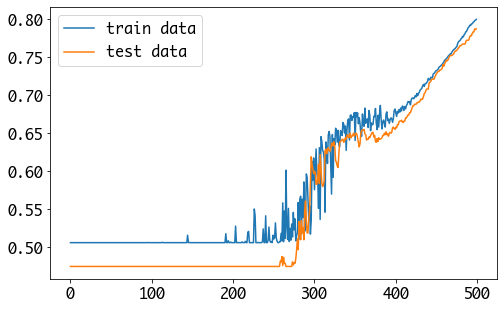

In [115]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.plot(fit_history.history["accuracy"], label="train data")
plt.plot(fit_history.history["val_accuracy"], label="test data")
plt.legend();

In [ ]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.plot(fit_history.history["loss"], label="train data")
plt.plot(fit_history.history["val_loss"], label="test data")
plt.legend();

### Check on the model architecture and find out what is the problem because the loss is not converging